### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import datasets
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Ignore warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Any missing values?
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Explore the data.
reviews['gender'].value_counts().head(20)

Female    1120
Male       880
Name: gender, dtype: int64

In [5]:
# Explore the data.
reviews['education'].value_counts().head(20)

graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

In [6]:
# Determine the minimum and maximum values on the int64 and float64 columns on the reviews DataFrame.
# Use appropriate docstrings.
print(
    f"The minimum age in the turtle_reviews dataset is {reviews['age'].min()}")
print(
    f"The maximum age in the turtle_reviews dataset is {reviews['age'].max()}")
print('')
print(
    f"The minimum remuneration (k£) in the turtle_reviews dataset is {reviews['remuneration (k£)'].min()}")
print(
    f"The maximum remuneration (k£) in the turtle_reviews dataset is {reviews['remuneration (k£)'].max()}")
print('')
print(
    f"The minimum loyalty points in the turtle_reviews dataset is {reviews['loyalty_points'].min()}")
print(
    f"The maximum loyalty points in the turtle_reviews dataset is {reviews['loyalty_points'].max()}")

The minimum age in the turtle_reviews dataset is 17
The maximum age in the turtle_reviews dataset is 72

The minimum remuneration (k£) in the turtle_reviews dataset is 12.3
The maximum remuneration (k£) in the turtle_reviews dataset is 112.34

The minimum loyalty points in the turtle_reviews dataset is 25
The maximum loyalty points in the turtle_reviews dataset is 6847


In [7]:
# Descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [8]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 'platform'], axis=1)

# View column names.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 3. Rename columns

In [9]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration',
                            'spending_score (1-100)': 'spending_score'})

# View column names.
print(reviews.shape)
print(reviews.head())
reviews.info()

(2000, 9)
   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen

## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.
reviews.to_csv('reviews.csv', index=False)

In [11]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('reviews.csv')

# View DataFrame.
reviews.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [12]:
# Check for uniqueness of reviews
reviews['review'].nunique()

1980

In [13]:
# Check for uniqueness of summary
reviews['summary'].nunique()

1432

In [14]:
# Split out the DataFrame - loyalty-Age
reviews_age = reviews[['loyalty_points', 'age']]

# View DataFrame
reviews_age.head()

loyalty_points  age
0             210   18
1             524   23
2              40   22
3             562   25
4             366   33

In [15]:
# Split out the DataFrame - loyalty-Remuneration
reviews_rem = reviews[['loyalty_points', 'remuneration']]

# View DataFrame
reviews_rem.head()

loyalty_points  remuneration
0             210         12.30
1             524         12.30
2              40         13.12
3             562         13.12
4             366         13.94

In [16]:
# Split out the DataFrame - Loyalty-Spending
reviews_spend = reviews[['loyalty_points', 'spending_score']]

# View DataFrame
reviews_spend.head()

loyalty_points  spending_score
0             210              39
1             524              81
2              40               6
3             562              77
4             366              40

In [17]:
# Split out the DataFrame - Loyalty-SPending-Age-Remuneration
reviews_mlr = reviews[['loyalty_points', 'spending_score', 'age', 'remuneration']]

# View DataFrame
reviews_mlr.head()

loyalty_points  spending_score  age  remuneration
0             210              39   18         12.30
1             524              81   23         12.30
2              40               6   22         13.12
3             562              77   25         13.12
4             366              40   33         13.94

## 5. Linear regression

### 5a) spending vs loyalty

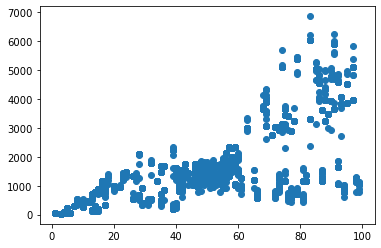

In [18]:
# Independent variable.
y = reviews_spend['loyalty_points'] 

# Dependent variable.
x = reviews_spend['spending_score'] 

# OLS model and summary.
plt.scatter(x, y)

(-1.0, 110.0)

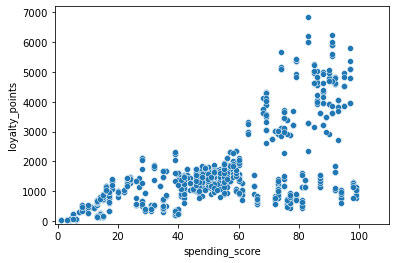

In [19]:
# Start with a visualisation BEFORE running linear regression.
sns.scatterplot(data=reviews_spend,
               x='spending_score',
               y='loyalty_points')

# Set axis values.
plt.ylim(-100, 7200)
plt.xlim(-1, 110)

In [20]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_spend).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        23:04:10   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_spend).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        23:04:10   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [23]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693 * reviews_spend['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

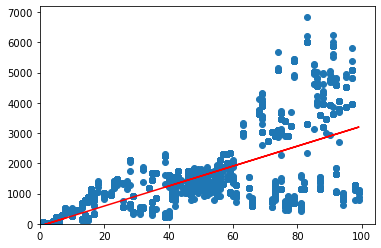

In [24]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) remuneration vs loyalty

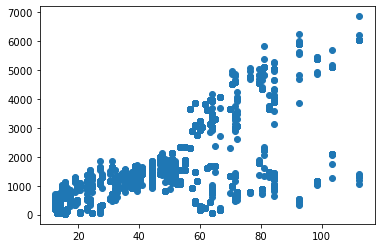

In [25]:
# Independent variable.
y = reviews_rem['loyalty_points'] 

# Dependent variable.
x = reviews_rem['remuneration'] 

# OLS model and summary.
plt.scatter(x, y)

In [26]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_rem).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        23:04:11   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [28]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686513) + 34.187825 * reviews_rem['remuneration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

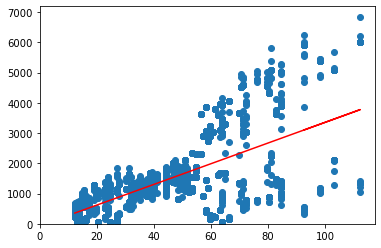

In [29]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

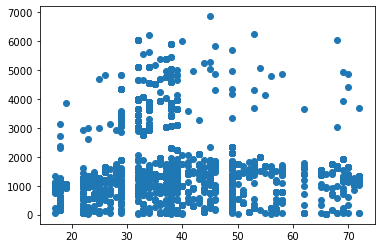

In [30]:
# Independent variable.
y = reviews_age['loyalty_points'] 

# Dependent variable.
x = reviews_age['age'] 

# OLS model and summary.
plt.scatter(x, y)

In [31]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_age).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0577
Time:                        23:04:11   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [33]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.517739) - 4.012805 * reviews_age['age']

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

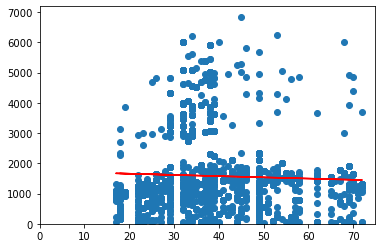

In [34]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5d) Multiple Linear Regression

In [35]:
# Define the dependent variable.
y = reviews_mlr['loyalty_points']  

# Define the independent variable.
X = reviews_mlr[['spending_score', 'remuneration', 'age']]

In [36]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y)

LinearRegression()

In [37]:
# Call the predictions for X (array).
mlr.predict(X)

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

In [38]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))

R-squared:  0.8399114912748795
Intercept:  -2203.059751307901
Coefficients:


[('spending_score', 34.183196577633666),
 ('remuneration', 34.00838549260249),
 ('age', 11.060658711843343)]

In [39]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [40]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     2513.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:04:11   Log-Likelihood:                -10711.
No. Observations:                1400   AIC:                         2.143e+04
Df Residuals:                    1396   BIC:                         2.145e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2185.5298     61.684    -35.

In [41]:
print(mlr.score(x_train, y_train)*100)

84.36143267390747


In [42]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [43]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [-220.33746102 3547.04684722 2994.54777478 ... 1778.6061872  1394.66891385
 1443.50341373]


In [44]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100)

83.00534613807653


In [45]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0        20.5           const
1         1.1  spending_score
2         1.0    remuneration
3         1.1             age


In [46]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [47]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 32.07984528506527, 'LM Test p-value': 5.034558891746587e-07, 'F-stat': 10.91278704233133, 'F-test p-value': 4.3690776756388403e-07}


In [48]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))

Mean Absolute Error (Final): 398.0269061972348
Mean Square Error (Final): 275278.8844648307


## 6. Observations and insights

***Your observations here...***






After having completed linear regressions between Spending Score vs Loyalty, Remuneration vs Loyalty, Age vs Loyalty
and Multiple Linear Regression it can be concluded that:
1. There is a positive correlation between Remuneration and Loyalty Points accumulation, which could mean higher salary leads to more disposable income and this could drive extra spending.
2. The more customer spend, the higher the loyalty points they accumulate, however some of the high spenders do not accumulate sufficient loyalty points therefore the loyalty programme should be revisited.
3. However, there seemingly is no real correlation between Age and Loyalty, even though more of those aged between 30 and 40 are clustered together with substantially higher numbers of Loyalty Points than any of the other age groups.
4. Multiple linear regression model R-Squared 84% Train, 83% Test datasets shows high accuracy, as well as the VIF factor hovering around 1 which shows the reliability of the constructed model.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [49]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [50]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews.csv')

# View DataFrame.
df2.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [51]:
# Drop unnecessary columns.
df2 = df2.drop(['gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary'], axis=1)

# View column names.
df2.head()

remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [52]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [53]:
# Descriptive statistics.
df2.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

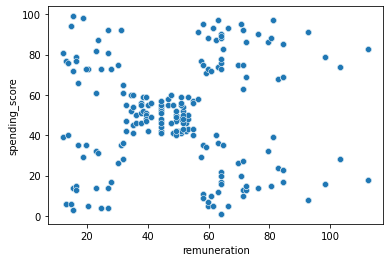

In [54]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

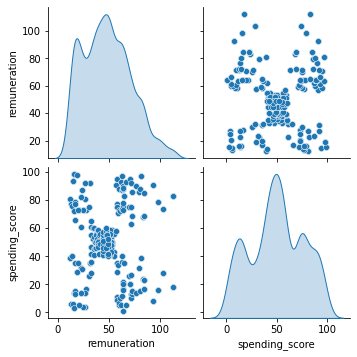

In [55]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2, vars=x, diag_kind='kde')

## 3. Elbow and silhouette methods

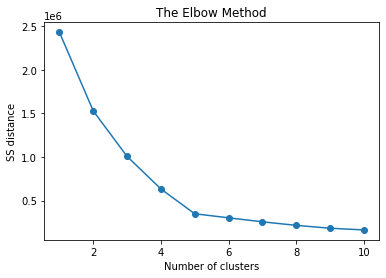

In [56]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

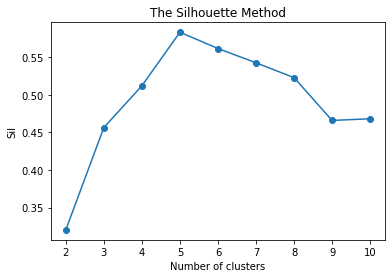

In [57]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

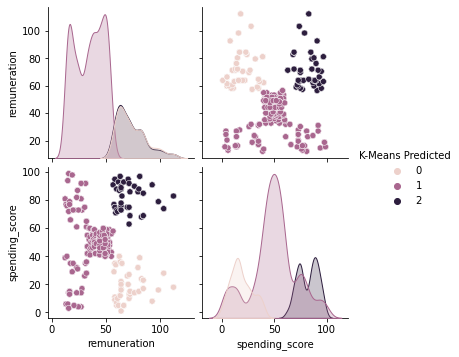

In [58]:
# Use three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [59]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

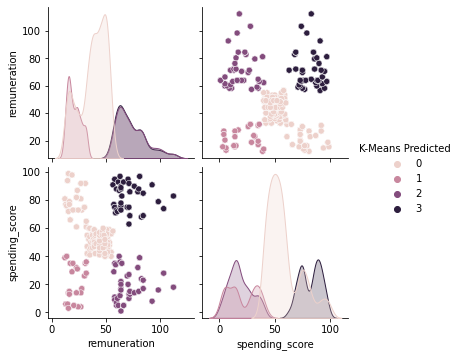

In [60]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [61]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

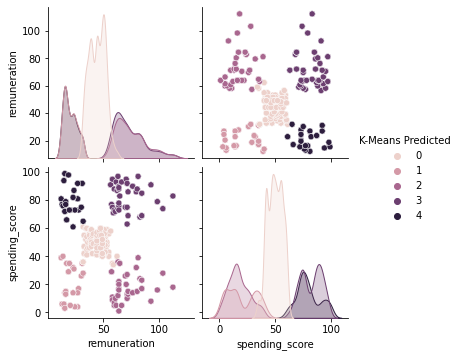

In [62]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [63]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

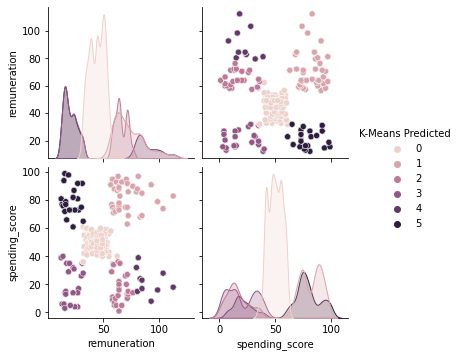

In [64]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [65]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

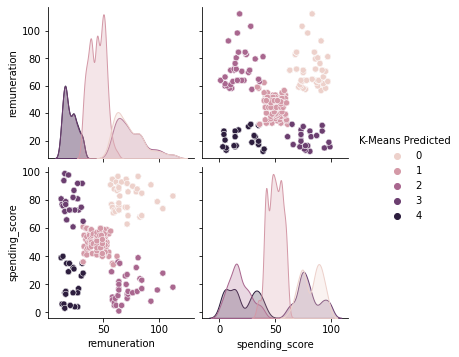

In [66]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [67]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

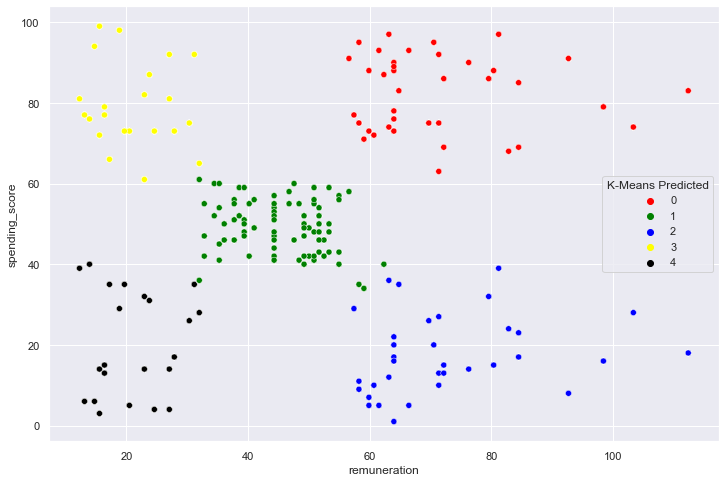

In [68]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'black'])

## 7. Discuss: Insights and observations

***Your observations here...***

1. Elbow and silhouette methods have been used to determine that the best number of unique clusters is 5.
2. To validate this then several K-Means clustering simulations had been run ranging from 3 to 6 which yielded a clear confirmation that 5 is the best option.
3. Further to that each of the clusters would need to be investigated further. The dataset subsets for each of the clusters would need to be investigated and targeted separately based on the demographics, buying patterns and other cluster specific attributes. Further information from the Turtle Games collected about its customers would be required to assess each of the clusters deeper.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [69]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from scipy.stats import norm
from sklearn.feature_extraction.text import CountVectorizer

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [70]:
# Load the data set as df3.
df3 = pd.read_csv('reviews.csv')

# View DataFrame.
df3.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [71]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [72]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3.drop(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product'], axis=1)

# View column names.
df3.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [73]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [74]:
# Review: Change all to lower case and join with a space.
# Transform data to lowercase.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [75]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [76]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [77]:
# Replace all the punctuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [78]:
# Check the number of duplicate values in the review column.
df3.review.duplicated().sum()

50

In [79]:
# Check the number of duplicate values in the summary column.
df3.summary.duplicated().sum()

649

In [80]:
# Drop duplicates in review column.
df3_review = df3.drop_duplicates(subset=['review'])

# View DataFrame.
df3_review.reset_index(inplace=True)
df3_review.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [81]:
# Drop duplicates in summary column.
df3_summary = df3.drop_duplicates(subset=['summary'])

# View DataFrame.
df3_summary.reset_index(inplace=True)
df3_summary.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [82]:
# Check the number of duplicate values in the review column.
df3_review.review.duplicated().sum()

0

In [83]:
# Check the number of duplicate values in the summary column.
df3_summary.summary.duplicated().sum()

0

In [84]:
# Create a CSV file as output.
df3_review.to_csv('df3_review.csv', index=False)
df3_summary.to_csv('df3_summary.csv', index=False)

In [85]:
# View the shape of the data.
df3_review.shape

(1950, 3)

In [86]:
# View the shape of the data.
df3_summary.shape

(1351, 3)

## 3. Tokenise and create wordclouds

In [87]:
# Create new DataFrame (copy DataFrame).
tokens_rev = pd.DataFrame(df3_review)

# View DataFrame.
tokens_rev.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [88]:
# Create new DataFrame (copy DataFrame).
tokens_sum = pd.DataFrame(df3_summary)

# View DataFrame.
tokens_sum.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [89]:
# String all the reviews together in a single variable.
# Create an empty string variable.
all_reviews = ''
for i in range(tokens_rev.shape[0]):
    # Add each review.
    all_reviews = all_reviews + tokens_rev['review'][i]

In [90]:
# String all the summaries together in a single variable.
# Create an empty string variable.
all_summary = ''
for i in range(tokens_sum.shape[0]):
    # Add each summary.
    all_summary = all_summary + tokens_sum['summary'][i]

In [91]:
# Review: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_reviews = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews)

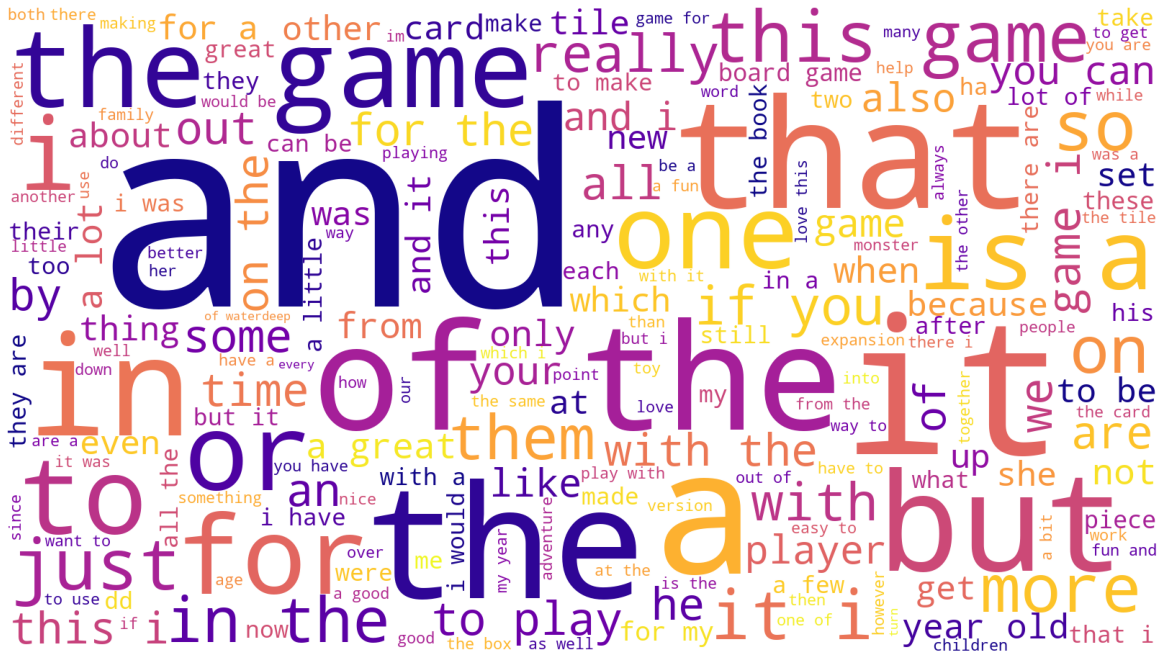

In [92]:
# Review: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_reviews) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly from the one provided.

In [93]:
# Summary: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_summary = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary)

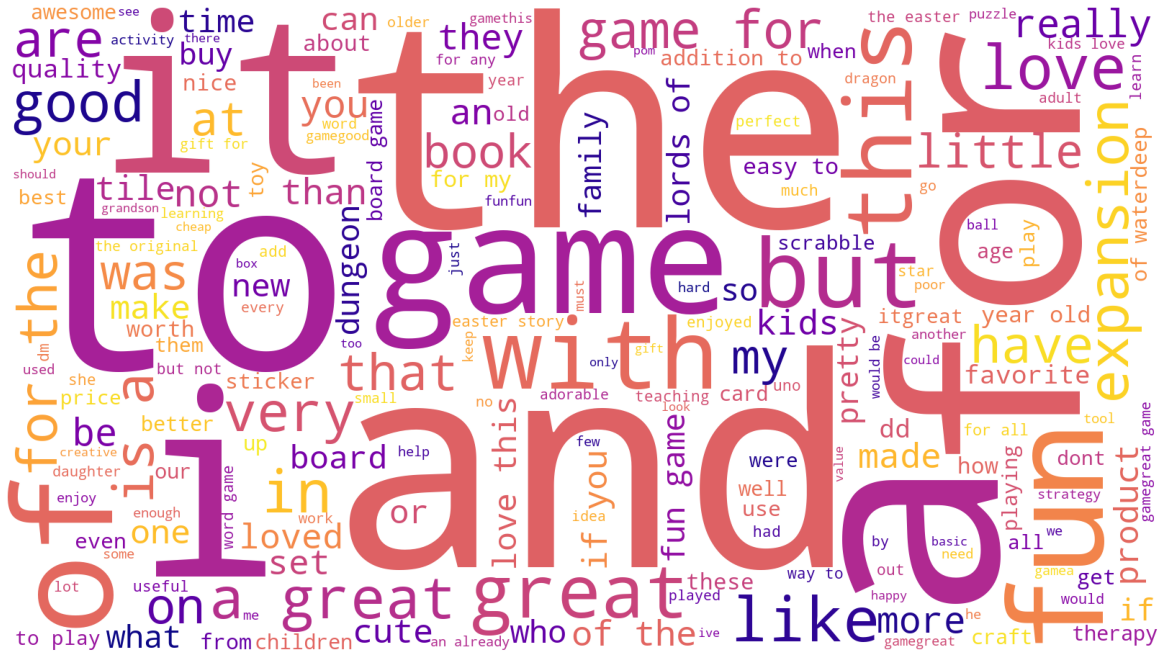

In [94]:
# Summary: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly from the one provided.

## 4. Frequency distribution and polarity

In [95]:
# Tokenise the words.
tokens_rev['tokens_review'] = tokens_rev['review'].apply(word_tokenize)

# Preview data.
tokens_rev['tokens_review'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens_review, dtype: object

In [96]:
# Define an empty list of tokens.
all_tokens_review = []

for i in range(tokens_rev.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + tokens_rev['tokens_review'][i]

In [97]:
# Tokenise the words.
tokens_sum['tokens_summary'] = tokens_sum['summary'].apply(word_tokenize)

# Preview data.
tokens_sum['tokens_summary'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens_summary, dtype: object

In [98]:
# Define an empty list of tokens.
all_tokens_summary = []

for i in range(tokens_sum.shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary + tokens_sum['tokens_summary'][i]

### 4a) Create frequency distribution

In [99]:
# Determine the frequency distribution.
fdist_review = FreqDist(all_tokens_review)

# Preview data.
fdist_review

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

In [100]:
# Determine the frequency distribution.
fdist_summary = FreqDist(all_tokens_summary)

# Preview data.
fdist_summary

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [101]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_review_new = [word for word in all_tokens_review if word.isalnum()]

In [102]:
# Remove all the stopwords
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens_review = [x for x in tokens_review_new if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_review_string = ''

for value in tokens_review:
    # Add each filtered token word to the string.
    tokens_review_string = tokens_review_string + value + ' '

In [103]:
# Create a wordcloud without stop words.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_review_string)

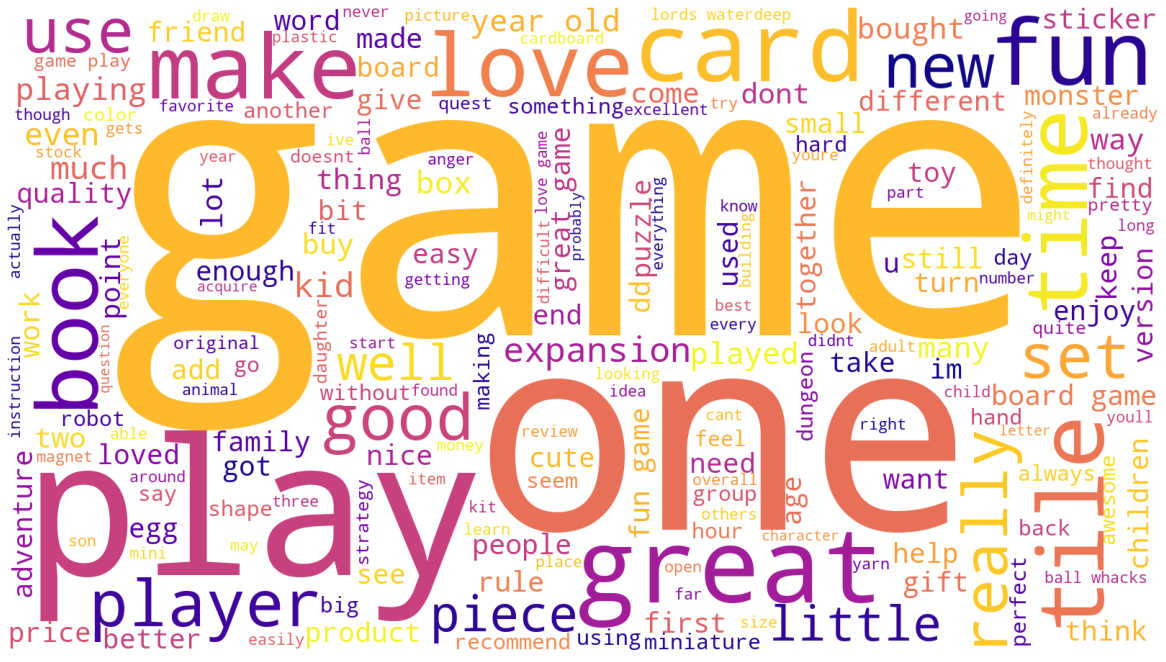

In [104]:
# Plot the wordcloud image.
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

In [105]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_summary_new = [word for word in all_tokens_summary if word.isalnum()]

In [106]:
# Remove all the stopwords
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens_summary = [x for x in tokens_summary_new if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_summary_string = ''

for value in tokens_summary:
    # Add each filtered token word to the string.
    tokens_summary_string = tokens_summary_string + value + ' '

### 4c) Create wordcloud without stopwords

In [107]:
# Create a wordcloud without stop words.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_summary_string)

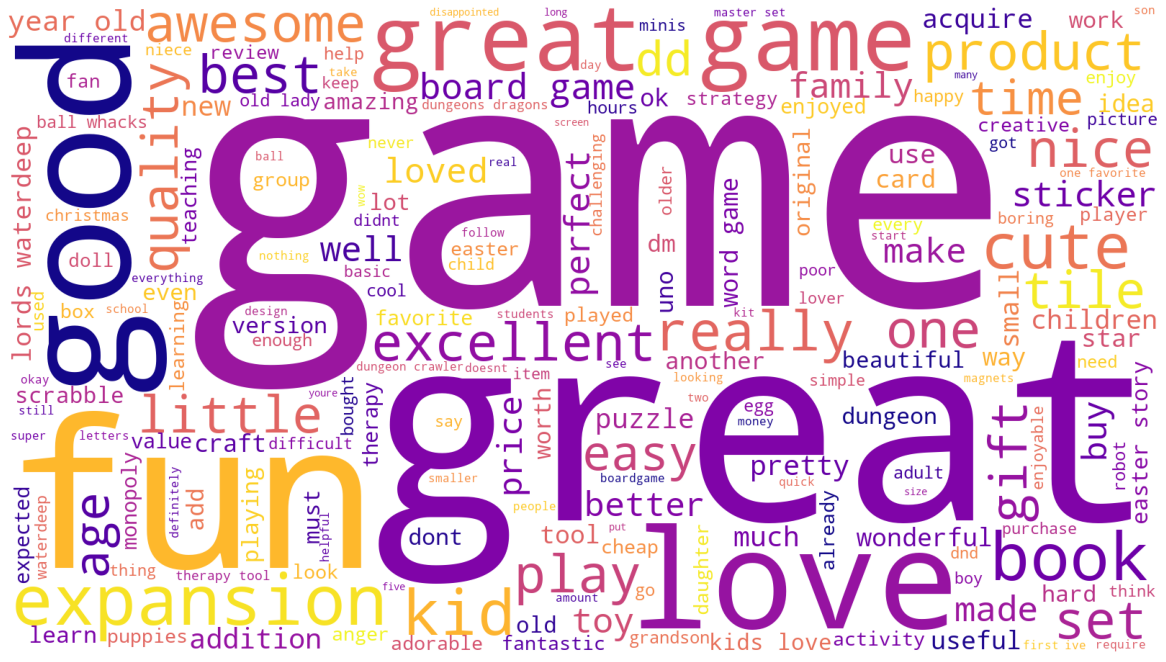

In [108]:
# Plot the wordcloud image.
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

In [109]:
# Determine the frequency distribution.
fdist_summary = FreqDist(tokens_summary)

# Preview data.
fdist_summary

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [110]:
# Determine the frequency distribution.
fdist_review = FreqDist(tokens_review)

# Preview data.
fdist_review

FreqDist({'game': 1668, 'great': 579, 'fun': 549, 'one': 530, 'play': 502, 'like': 414, 'love': 322, 'really': 319, 'get': 319, 'cards': 301, ...})

### 4d) Identify 15 most common words and polarity

In [111]:
# Determine the 15 most common words.
# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

Frequency
Word                
game             268
great            237
fun              175
good              84
love              70
like              54
kids              48
book              42
expansion         42
cute              40
old               34
really            30
set               30
nice              28
one               28

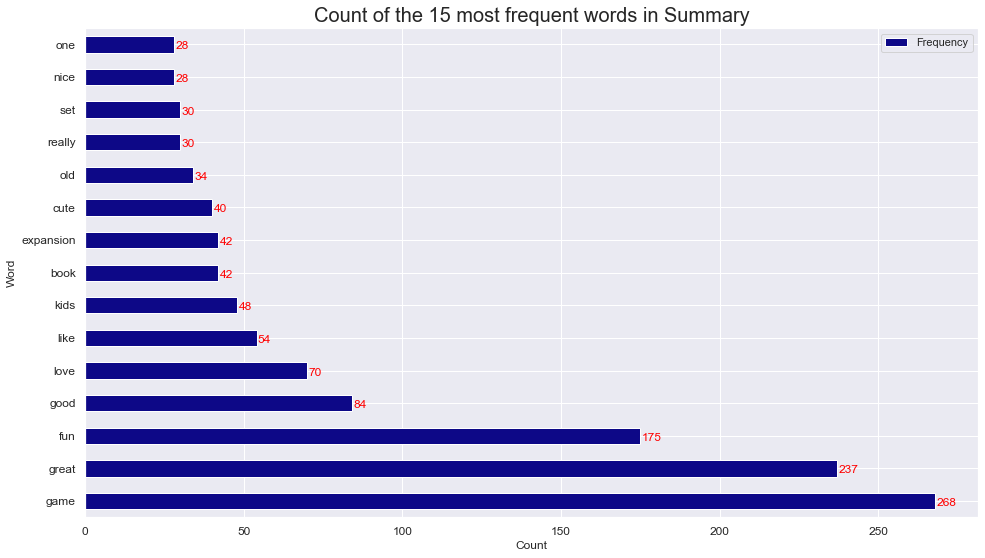

In [112]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Count of the 15 most frequent words in Summary",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [113]:
# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

Frequency
Word             
game         1668
great         579
fun           549
one           530
play          502
like          414
love          322
really        319
get           319
cards         301
tiles         297
time          291
good          287
would         280
book          273

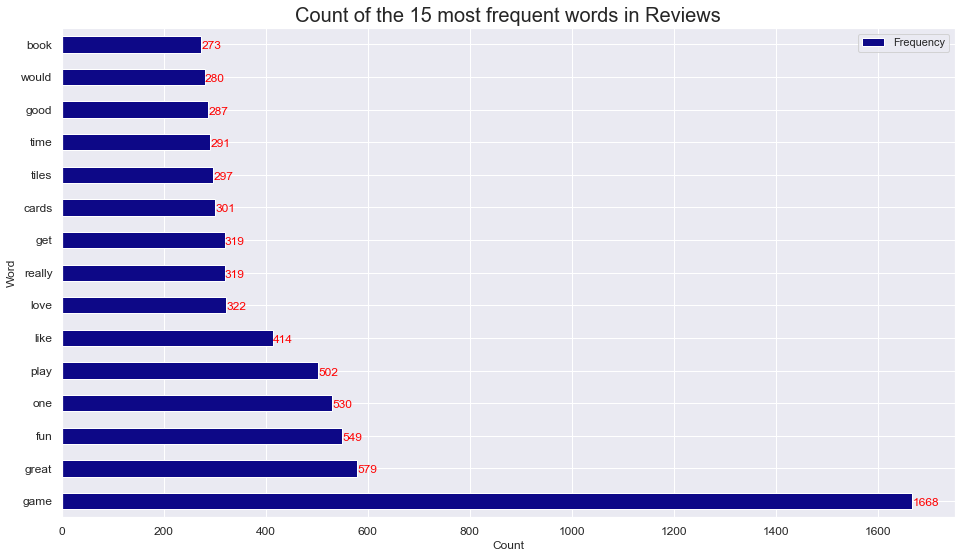

In [114]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Count of the 15 most frequent words in Reviews",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [115]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [116]:
# Populate a new column with polarity scores for each comment.
tokens_rev['polarity'] = tokens_rev['review'].apply(generate_polarity)

# Preview the result.
tokens_rev['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

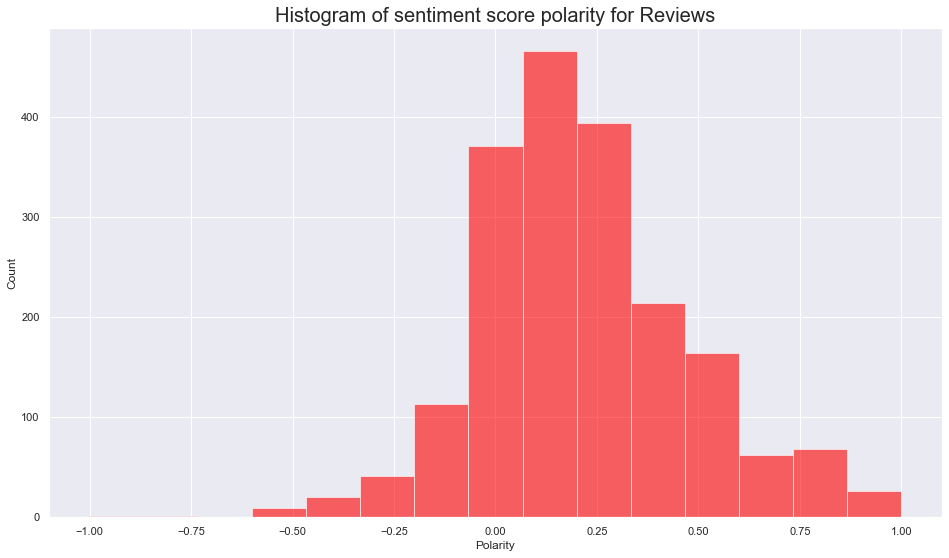

In [117]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(tokens_rev['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Reviews', fontsize=20)

plt.show()

In [118]:
# Populate a new column with polarity scores for each comment.
tokens_sum['polarity'] = tokens_sum['summary'].apply(generate_polarity)

# Preview the result.
tokens_sum['polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

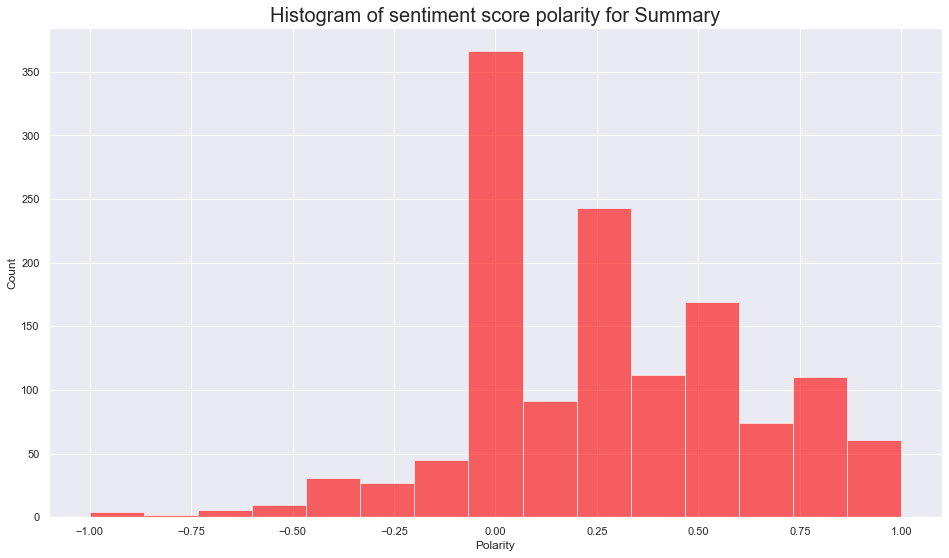

In [119]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(tokens_sum['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Summary', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [120]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment = tokens_rev.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review', 'polarity']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

In [121]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment = tokens_sum.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['summary', 'polarity']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

In [122]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment = tokens_rev.nlargest(10, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review', 'polarity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

In [123]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment = tokens_sum.nlargest(10, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary', 'polarity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

In [124]:
import spacy

# Load the English resource.
nlp = spacy.load('en_core_web_sm')

# Return the text snippet and its corresponding entity label in a list.
def generate_named_entities(comment):
    return [(ent.text.strip(), ent.label_) for ent in nlp(comment).ents]

In [125]:
tokens_rev['named_entities'] = tokens_rev['review'].apply(generate_named_entities)

tokens_rev.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       tokens_review  polarity  \
0  [when, it, comes, to, a, dms, screen, the, spa... -0.036111   
1  [an, open, letter, to, galeforce9, your, unpai...  0.035952   
2  [nice, art, nice, printing, why, two, panels, ...  0.116640   
3  [amazing, buy, bought, it, as, a, gift, for, o...  0.578788   
4  [as, my, review, of, gf9s, previous, screens, ... -0.316667   

                                      named_entities  
0     [(50, CARDINAL), (2, CARDINAL), (1, CARDINAL)]  
1                                [(galeforce9, ORG)]  
2  [(two, CARDINAL), (one, CARDINAL), (one, CARDI...  
3                                                 []  
4                                      [(gf9s, ORG)]

In [126]:
from spacy import displacy

# Iterate through a selection of comments.
for i in range(750,1750):
    # Check whether the corresponding comment has a named entity.
    if tokens_rev['named_entities'][i]:
        # Highlight the entity in the comment.
        displacy.render(nlp(tokens_rev['review'][i]), style='ent', jupyter=True)

In [127]:
tokens_sum['named_entities'] = tokens_sum['summary'].apply(generate_named_entities)

tokens_sum.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                      tokens_summary  polarity  \
0  [the, fact, that, 50, of, this, space, is, was...      0.15   
1  [another, worthless, dungeon, masters, screen,...     -0.80   
2               [pretty, but, also, pretty, useless]      0.00   
3                                      [five, stars]      0.00   
4                                      [money, trap]      0.00   

        named_entities  
0     [(50, CARDINAL)]  
1  [(galeforce9, ORG)]  
2                   []  
3   [(five, CARDINAL)]  
4                   []

In [128]:
from spacy import displacy

# Iterate through a selection of comments.
for i in range(750,1750):
    # Check whether the corresponding comment has a named entity.
    if tokens_sum['named_entities'][i]:
        # Highlight the entity in the comment.
        displacy.render(nlp(tokens_sum['summary'][i]), style='ent', jupyter=True)

KeyError: 1351

In [129]:
# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(tokens_rev['review'])

In [130]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

            Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
screen          2      2      2      0      0      0      1      0      1   
adventure       0      2      4      0      0      0      0      0      0   
map             0      1      3      0      0      0      0      0      1   
useful          0      2      5      0      0      0      0      0      0   
use             0      1      4      0      0      0      0      0      0   
screens         0      2      2      0      1      0      1      0      0   
dm              0      2      1      1      0      0      0      0      0   
space           2      0      1      0      0      0      0      0      0   
completely      2      0      0      0      1      0      0      0      0   
dms             1      0      1      0      0      0      0      0      1   

            Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
screen           5       0       0       2       0       0  
adventure        5       0    

<AxesSubplot:>

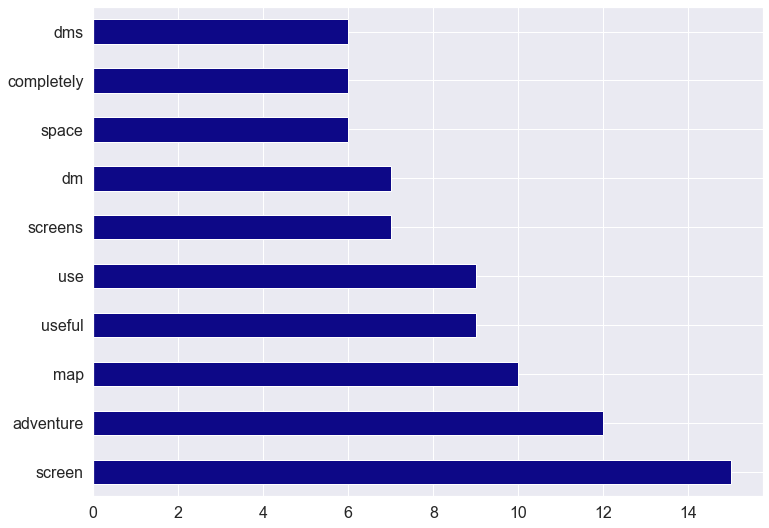

In [131]:
document_term_matrix['total_count'].plot.barh(figsize=(12, 9),
                                              fontsize=16,
                                              colormap ='plasma')

In [132]:
# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(tokens_sum['summary'])

In [133]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

            Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
screen          0      1      0      0      0      1      0      0      0   
good            0      0      0      0      0      0      0      0      0   
pretty          0      0      2      0      0      0      0      0      0   
art             2      0      0      0      0      0      0      0      0   
value           0      0      0      0      0      0      0      1      0   
mommer          0      0      0      0      0      0      0      0      0   
missed          0      0      0      0      0      0      0      1      0   
useless         0      0      1      0      0      0      0      0      0   
galeforce9      0      1      0      0      0      0      0      0      0   
dm              0      0      0      0      0      0      0      0      0   

            Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
screen           1       0       0       0       0       0  
good             0       0    

<AxesSubplot:>

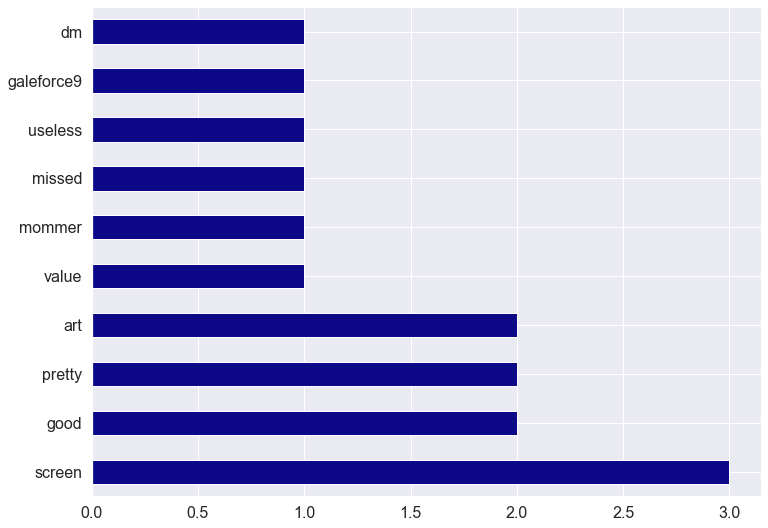

In [134]:
document_term_matrix['total_count'].plot.barh(figsize=(12, 9),
                                              fontsize=16,
                                              colormap ='plasma')

## 7. Discuss: Insights and observations

***Your observations here...***

1. After reviewing the clean version of the word cloud and also consulting the most frequently used words. Most common ones are Game, Great, Fun, Love, Like on both the Review and Summary columns at the top of the list which at a glance shows positivity towards to gaming products on offer.
2. To validate the above success the polarity of the most frequently words used needs to be assessed and it can clearly be evidenced that in most part the reviews are either positive or positively neutral on both the review and summary columns. The majority of the distribution for review column is between 0 and 0.5 which is somewhat positive, ranging all the way to 1.
3. The summary column is more fragmented ranging from predominantly neutral to chunks of words standing at 0.25, 0.5 and 0.75, which also signals for the positive sentiment.
4. There are only a tiny fraction of negative reviews and summary words compared to the overall distribution of the token words.
5. After further consulting the document term matrix it is quite difficult to gauge the sentiment and the words resemble the gaming slang more than anything else, so would not be particularly useful for the given analysis.
6. However to deep dive further - the most positive and the most negative reviews need to be thoroughly reviewed and analysed to keep doing well the things that are going well for the business and understand and improve the areas where the offering is not delivering what the audience expects.
7. Vector words could also be taken into account for further analysis in conjunction with the most negative reviews.

# 